# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

In [1]:
from IPython.display import Image


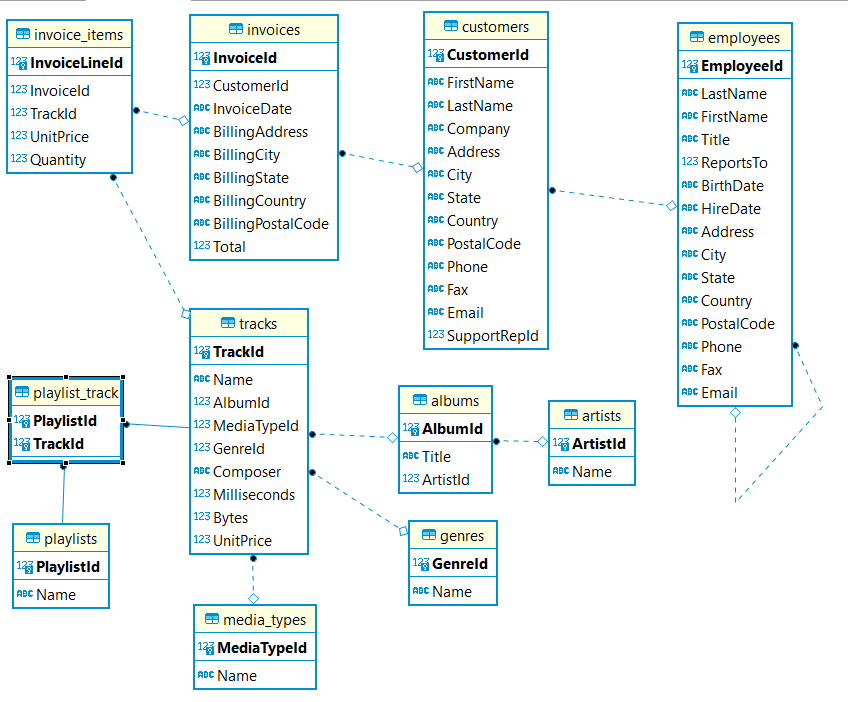

In [2]:
Image("snaps/ER.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [3]:
import os
import sqlite3
import pandas as pd   

In [4]:
from pathlib import Path

In [5]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [6]:
# requête de départ
query = """
 SELECT e.EmployeeId AS 'Id',
 e.firstname || ' ' || e.lastname AS 'Employee',
 e.Title,
 m.firstname || ' ' || m.lastname AS 'maneger'
 FROM employees  e
 LEFT JOIN employees m ON m.EmployeeId=e.ReportsTo;
"""

In [7]:
results = pd.read_sql_query(query, conn)
results

,Id,Employee,Title,maneger
0,1,Andrew Adams,General Manager,None
1,2,Nancy Edwards,Sales Manager,Andrew Adams
2,3,Jane Peacock,Sales Support Agent,Nancy Edwards
3,4,Margaret Park,Sales Support Agent,Nancy Edwards
4,5,Steve Johnson,Sales Support Agent,Nancy Edwards
5,6,Michael Mitchell,IT Manager,Andrew Adams
6,7,Robert King,IT Staff,Michael Mitchell
7,8,Laura Callahan,IT Staff,Michael Mitchell


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [8]:
# requête de départ
query = """
SELECT artists.Name AS Artists,
albums.Title AS Titre_albums,
COUNT(albums.AlbumId) AS nombres_albums
FROM artists
LEFT JOIN albums ON albums.ArtistId=artists.ArtistId
GROUP BY artists.ArtistId
ORDER BY artists.name
 ;
"""

In [9]:
results = pd.read_sql_query(query, conn)
results

,Artists,Titre_albums,nombres_albums
0,A Cor Do Som,None,0
1,AC/DC,For Those About To Rock We Salute You,2
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",1
3,Aaron Goldberg,Worlds,1
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,1
...,...,...,...
270,Xis,None,0
271,Yehudi Menuhin,Bartok: Violin & Viola Concertos,1
272,Yo-Yo Ma,Bach: The Cello Suites,1
273,Youssou N'Dour,None,0


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [10]:
query = """
 SELECT albums.Title AS "Titre de l'album",
 artists.Name AS "Nom de l'artiste",
 COUNT(tracks.TrackId) AS "Nb piste",
 SUM(tracks.Milliseconds/60000) AS "durée (min)",
 SUM(tracks.UnitPrice) AS "côte total"
 FROM artists 
 JOIN albums ON artists.ArtistId=albums.ArtistId
 JOIN tracks ON albums.AlbumId=tracks.AlbumId 
 GROUP BY artists.ArtistId, albums.Title
 ORDER BY artists.name
 LIMIT 15
 """

In [11]:
results = pd.read_sql_query(query, conn)
results

,Titre de l'album,Nom de l'artiste,Nb piste,durée (min),côte total
0,For Those About To Rock We Salute You,AC/DC,10,35,9.90
1,Let There Be Rock,AC/DC,8,38,7.92
2,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,1,3,0.99
3,Worlds,Aaron Goldberg,1,4,0.99
4,The World of Classical Favourites,Academy of St. Martin in the Fields & Sir Nevi...,2,7,1.98
5,Sir Neville Marriner: A Celebration,Academy of St. Martin in the Fields Chamber En...,1,5,0.99
6,"Fauré: Requiem, Ravel: Pavane & Others","Academy of St. Martin in the Fields, John Birc...",1,4,0.99
7,Bach: Orchestral Suites Nos. 1 - 4,"Academy of St. Martin in the Fields, Sir Nevil...",1,3,0.99
8,Balls to the Wall,Accept,1,5,0.99
9,Restless and Wild,Accept,3,13,2.97


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [12]:
query = """
SELECT playlists.Name AS "Playlists",
COUNT(tracks.TrackId) AS "Nb pistes",
COALESCE(SUM(tracks.Milliseconds/60000),0) AS "Durée (min)",
COALESCE(SUM(tracks.UnitPrice),0) AS "côut total"
FROM playlists
LEFT JOIN playlist_track ON playlists.playlistId=playlist_track.PlaylistId 
LEFT JOIN tracks ON playlist_track.TrackId=tracks.TrackId
GROUP BY playlists.PlaylistId
ORDER BY playlists.name

"""

In [13]:
results = pd.read_sql_query(query, conn)
results

,Playlists,Nb pistes,Durée (min),côut total
0,90’s Music,1477,5914,1462.23
1,Audiobooks,0,0,0.00
2,Audiobooks,0,0,0.00
3,Brazilian Music,39,141,38.61
4,Classical,75,329,74.25
5,Classical 101 - Deep Cuts,25,99,24.75
6,Classical 101 - Next Steps,25,117,24.75
7,Classical 101 - The Basics,25,113,24.75
8,Grunge,15,62,14.85
9,Heavy Metal Classic,26,123,25.74


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [14]:
query = """
SELECT genres.Name AS Genre,
COUNT(tracks.TrackId) AS "Nb pistes",
SUM(tracks.Milliseconds)/60000 AS "Durée (min)",
SUM(tracks.UnitPrice) AS "côut total",
AVG(tracks.UnitPrice) AS "côut moyens"
FROM genres 
LEFT JOIN tracks ON genres.GenreId=tracks.GenreId 
GROUP BY genres.GenreId
ORDER BY Genres.Name

"""

In [15]:
results = pd.read_sql_query(query, conn)
results

,Genre,Nb pistes,Durée (min),côut total,côut moyens
0,Alternative,40,176,39.60,0.99
1,Alternative & Punk,332,1296,328.68,0.99
2,Blues,81,364,80.19,0.99
3,Bossa Nova,15,54,14.85,0.99
4,Classical,74,362,73.26,0.99
5,Comedy,17,449,33.83,1.99
6,Drama,64,2746,127.36,1.99
7,Easy Listening,24,75,23.76,0.99
8,Electronica/Dance,30,151,29.70,0.99
9,Heavy Metal,28,138,27.72,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [16]:
query = """
SELECT tracks.Name AS piste,
albums.Title AS Album,
artists.Name AS Artiste,
tracks.Composer AS compsiteur,
media_types.Name AS "Type de média",
tracks.Milliseconds/1000 AS "Durée (sec)",
tracks.UnitPrice AS "Prix unitaire"
FROM tracks 
JOIN genres ON tracks.GenreId=genres.GenreId
LEFT JOIN media_types ON tracks.MediaTypeId=media_types.MediaTypeId
LEFT JOIN albums ON tracks.AlbumId=albums.AlbumId
LEFT JOIN artists ON albums.ArtistId=artists.ArtistId 
WHERE genres.name='Science Fiction'
ORDER BY tracks.Name
"""

In [17]:
results = pd.read_sql_query(query, conn)
results

,piste,Album,Artiste,compsiteur,Type de média,Durée (sec),Prix unitaire
0,A Day In the Life,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2620,1.99
1,A Measure of Salvation,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2563,1.99
2,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
3,Dirty Hands,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2627,1.99
4,Hero,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2713,1.99
5,Maelstrom,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2622,1.99
6,Rapture,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
7,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2624,1.99
8,The Eye of Jupiter,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2618,1.99
9,The Passage,"Battlestar Galactica, Season 3",Battlestar Galactica,None,Protected MPEG-4 video file,2623,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [18]:
query = """
SELECT c.firstname || ' ' || c.lastname AS 'Client',
c.Country AS Pays,
c.Email AS mail
FROM customers c
JOIN invoices ON c.CustomerId=invoices.CustomerId 
JOIN invoice_items ON invoices.InvoiceId=invoice_items.InvoiceId 
JOIN tracks ON invoice_items.TrackId=tracks.TrackId
JOIN genres ON tracks.GenreId=genres.GenreId 
WHERE c.Address=invoices.BillingAddress AND genres.Name='World'
GROUP BY c.CustomerId 

"""

In [19]:
results = pd.read_sql_query(query, conn)
results

,Client,Pays,mail
0,Bjørn Hansen,Norway,bjorn.hansen@yahoo.no
1,Roberto Almeida,Brazil,roberto.almeida@riotur.gov.br
2,Mark Philips,Canada,mphilips12@shaw.ca
3,Jennifer Peterson,Canada,jenniferp@rogers.ca
4,Martha Silk,Canada,marthasilk@gmail.com
5,Aaron Mitchell,Canada,aaronmitchell@yahoo.ca
6,João Fernandes,Portugal,jfernandes@yahoo.pt
7,Joakim Johansson,Sweden,joakim.johansson@yahoo.se
8,Steve Murray,United Kingdom,steve.murray@yahoo.uk


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [20]:
query = """
SELECT  artists.Name AS Artists, COUNT(tracks.TrackId) AS "Nb pistes"
FROM tracks 
join genres on  tracks.GenreId=genres.GenreId 
join albums on tracks.AlbumId=albums.AlbumId 
join artists on albums.ArtistId=artists.ArtistId 
WHERE genres.Name='Rock'
GROUP BY artists.ArtistId 
ORDER BY COUNT(tracks.TrackId) DESC
LIMIT 15

"""

In [21]:
results = pd.read_sql_query(query, conn)
results

,Artists,Nb pistes
0,Led Zeppelin,114
1,U2,112
2,Deep Purple,92
3,Iron Maiden,81
4,Pearl Jam,54
5,Van Halen,52
6,Queen,45
7,The Rolling Stones,41
8,Creedence Clearwater Revival,40
9,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [22]:
query = """
SELECT c.firstname || ' ' || c.lastname AS 'Client',
SUM(invoices.Total) AS "Dépenses totales"
FROM customers c 
JOIN invoices  ON c.CustomerId=invoices.CustomerId 
GROUP BY c.CustomerId 
ORDER BY SUM(invoices.Total) DESC
LIMIT 5

"""

In [23]:
results = pd.read_sql_query(query, conn)
results

,Client,Dépenses totales
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [24]:
query = """
SELECT tracks.Name AS Piste,
albums.Title AS Album,
artists.Name AS Artists,
invoices.InvoiceDate AS "Date",
genres.Name AS Genre,
media_types.Name AS "Type média"
FROM customers c 
JOIN invoices ON c.CustomerId=invoices.CustomerId 
LEFT JOIN invoice_items ON invoices.InvoiceId=invoice_items.InvoiceId 
LEFT JOIN tracks ON invoice_items.TrackId=tracks.TrackId 
LEFT JOIN media_types ON tracks.MediaTypeId=media_types.MediaTypeId,
genres ON tracks.GenreId=genres.GenreId,
albums ON tracks.AlbumId=albums.AlbumId
LEFT JOIN artists ON albums.ArtistId=artists.ArtistId 
WHERE c.FirstName='Richard' AND c.LastName='Cunningham'
ORDER BY invoices.InvoiceDate DESC


"""

In [25]:
results = pd.read_sql_query(query, conn)
results

,Piste,Album,Artists,Date,Genre,Type média
0,American Idiot,American Idiot,Green Day,2013-04-05 00:00:00,Alternative & Punk,MPEG audio file
1,Give Me Novacaine,American Idiot,Green Day,2013-04-05 00:00:00,Alternative & Punk,MPEG audio file
2,Whatsername,American Idiot,Green Day,2013-04-05 00:00:00,Alternative & Punk,MPEG audio file
3,Paradise City,Appetite for Destruction,Guns N' Roses,2013-04-05 00:00:00,Rock,Protected AAC audio file
4,Rocket Queen,Appetite for Destruction,Guns N' Roses,2013-04-05 00:00:00,Rock,Protected AAC audio file
5,You Ain't the First,Use Your Illusion I,Guns N' Roses,2013-04-05 00:00:00,Rock,Protected AAC audio file
6,Garden of Eden,Use Your Illusion I,Guns N' Roses,2013-04-05 00:00:00,Rock,Protected AAC audio file
7,14 Years,Use Your Illusion II,Guns N' Roses,2013-04-05 00:00:00,Metal,MPEG audio file
8,Pretty Tied Up,Use Your Illusion II,Guns N' Roses,2013-04-05 00:00:00,Metal,MPEG audio file
9,"Crossroads, Pt. 1","Battlestar Galactica, Season 3",Battlestar Galactica,2012-08-05 00:00:00,Sci Fi & Fantasy,Protected MPEG-4 video file


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [26]:
query = """
SELECT c.firstname || ' ' || c.lastname AS 'Prénom Nom',
c.Email,
c.Country,
c.Phone,
'client' AS Type
FROM customers c 
UNION
SELECT e.firstname || ' ' || e.lastname AS 'Prénom Nom',
e.Email,
e.Country,
e.Phone,
'employees' AS Type
FROM employees e 
"""

In [27]:
results = pd.read_sql_query(query, conn)
results

,Prénom Nom,Email,Country,Phone,Type
0,Aaron Mitchell,aaronmitchell@yahoo.ca,Canada,+1 (204) 452-6452,client
1,Alexandre Rocha,alero@uol.com.br,Brazil,+55 (11) 3055-3278,client
2,Andrew Adams,andrew@chinookcorp.com,Canada,+1 (780) 428-9482,employees
3,Astrid Gruber,astrid.gruber@apple.at,Austria,+43 01 5134505,client
4,Bjørn Hansen,bjorn.hansen@yahoo.no,Norway,+47 22 44 22 22,client
...,...,...,...,...,...
62,Steve Murray,steve.murray@yahoo.uk,United Kingdom,+44 0131 315 3300,client
63,Terhi Hämäläinen,terhi.hamalainen@apple.fi,Finland,+358 09 870 2000,client
64,Tim Goyer,tgoyer@apple.com,USA,+1 (408) 996-1010,client
65,Victor Stevens,vstevens@yahoo.com,USA,+1 (608) 257-0597,client


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [28]:
query = """
SELECT invoices.BillingCountry AS pays,
SUM(invoices.Total) AS "Total Ventes par pays",
ROUND(SUM(invoices.Total)/(SELECT SUM(invoices.Total) FROM invoices)*100,2) AS "ventes%"
FROM invoices
GROUP BY invoices.BillingCountry
ORDER BY SUM(invoices.Total) DESC

"""

In [29]:
results = pd.read_sql_query(query, conn)
results

,pays,Total Ventes par pays,ventes%
0,USA,523.06,22.46
1,Canada,303.96,13.05
2,France,195.10,8.38
3,Brazil,190.10,8.16
4,Germany,156.48,6.72
5,United Kingdom,112.86,4.85
6,Czech Republic,90.24,3.88
7,Portugal,77.24,3.32
8,India,75.26,3.23
9,Chile,46.62,2.00
